In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import glob
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
import os
import shutil

def copy_images(source_dirs, dest_dir, real_folders, fake_folders):
    os.makedirs(os.path.join(dest_dir, "real"), exist_ok=True)
    os.makedirs(os.path.join(dest_dir, "fake"), exist_ok=True)

    def copy_from(source, label):
        dest_label_dir = os.path.join(dest_dir, label)
        if not os.path.exists(source):
            print(f"❌ Skipped missing folder: {source}")
            return
        for img_name in os.listdir(source):
            src_path = os.path.join(source, img_name)
            if os.path.isfile(src_path):
                new_name = f"{os.path.basename(source)}_{img_name}"
                dst_path = os.path.join(dest_label_dir, new_name)
                shutil.copy(src_path, dst_path)

    # Copy all real and fake folders
    for folder in real_folders:
        copy_from(folder, "real")
    for folder in fake_folders:
        copy_from(folder, "fake")

    print("✅ All datasets merged into:", dest_dir)

# Define your folders here
real_folders = [
    r"C:\Users\akanksha meshram\Downloads\archive (6)\1000_videos\validation\real",
    r"C:\Users\akanksha meshram\Downloads\archive (6)\1000_videos\train\real",
    r"C:\Users\akanksha meshram\Downloads\archive (6)\1000_videos\test\real",
    r"C:\Users\akanksha meshram\OneDrive\real_and_fake_face\training_real"]

fake_folders = [
    r"C:\Users\akanksha meshram\Downloads\archive (6)\1000_videos\validation\fake",
    r"C:\Users\akanksha meshram\Downloads\archive (6)\1000_videos\train\fake",
    r"C:\Users\akanksha meshram\Downloads\archive (6)\1000_videos\test\fake",
    r"C:\Users\akanksha meshram\OneDrive\real_and_fake_face\training_fake"]

# Destination folder for merged dataset
merged_dataset_path = r"C:\Users\akanksha meshram\Downloads\Deepfake\merged_dataset"

# Run the merge
copy_images(real_folders + fake_folders, merged_dataset_path, real_folders, fake_folders)


✅ All datasets merged into: C:\Users\akanksha meshram\Downloads\Deepfake\merged_dataset


In [11]:


# Path to merged dataset
merged_path = r"C:\Users\akanksha meshram\Downloads\Deepfake\merged_dataset"
real_path = os.path.join(merged_path, "real")
fake_path = os.path.join(merged_path, "fake")

real_count = len([f for f in os.listdir(real_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
fake_count = len([f for f in os.listdir(fake_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
print(f"Number of real images: {real_count}")
print(f"Number of fake images: {fake_count}")

Number of real images: 9586
Number of fake images: 9388


In [6]:
import os

# Folder containing your images
folder_path = r"C:\Users\akanksha meshram\OneDrive\Documents\Desktop\dataset\merged_dataset\real"

# Get list of image files (sorted by name)
images = sorted(os.listdir(folder_path))

# Choose how many to delete
num_to_delete = 5000

# Loop and delete
for img in images[:num_to_delete]:
    file_path = os.path.join(folder_path, img)
    if os.path.isfile(file_path):
        os.remove(file_path)

print(f"{num_to_delete} images deleted successfully.")


5000 images deleted successfully.


In [12]:
import os
import cv2
import random

input_real_folder = r"C:\Users\akanksha meshram\Downloads\Deepfake\merged_dataset\real"
output_filtered_real = r"C:\Users\akanksha meshram\Downloads\Deepfake\merged_dataset\real_filtered"
os.makedirs(output_filtered_real, exist_ok=True)

# Choose N random images to apply filters to
num_to_filter = 500 # adjust as needed
real_images = [f for f in os.listdir(input_real_folder) if f.endswith(('.jpg', '.png'))]
selected = random.sample(real_images, min(num_to_filter, len(real_images)))


for i, filename in enumerate(selected):
    img_path = os.path.join(input_real_folder, filename)
    img = cv2.imread(img_path)

    # Apply pseudo-filter effects (feel free to modify)
    filtered = cv2.bilateralFilter(img, 9, 75, 75)  # smoothing
    filtered = cv2.convertScaleAbs(filtered, alpha=1.2, beta=20)  # brightness boost

    save_name = f"filtered_{i}_{filename}"
    save_path = os.path.join(output_filtered_real, save_name)
    cv2.imwrite(save_path, filtered)

print(f"✅ Created {len(selected)} filtered real images in:", output_filtered_real)


✅ Created 500 filtered real images in: C:\Users\akanksha meshram\Downloads\Deepfake\merged_dataset\real_filtered


In [13]:
import shutil

filtered_images = os.listdir(output_filtered_real)
for file in filtered_images:
    shutil.move(
        os.path.join(output_filtered_real, file),
        os.path.join(input_real_folder, file)
    )
print(f"✅ Moved filtered images back to: {input_real_folder}")

✅ Moved filtered images back to: C:\Users\akanksha meshram\Downloads\Deepfake\merged_dataset\real


In [14]:
import os
import glob

# Correct paths — point to actual folders
real_path = r"C:\Users\akanksha meshram\Downloads\Deepfake\merged_dataset\real"
fake_path = r"C:\Users\akanksha meshram\Downloads\Deepfake\merged_dataset\fake"

# Match all image types
real_images = glob.glob(os.path.join(real_path, "*.jpg")) + \
              glob.glob(os.path.join(real_path, "*.jpeg")) + \
              glob.glob(os.path.join(real_path, "*.png"))

fake_images = glob.glob(os.path.join(fake_path, "*.jpg")) + \
              glob.glob(os.path.join(fake_path, "*.jpeg")) + \
              glob.glob(os.path.join(fake_path, "*.png"))



print(f"✅ Found {len(real_images)} real images")
print(f"✅ Found {len(fake_images)} fake images")


✅ Found 10086 real images
✅ Found 9388 fake images


In [15]:
if abs(len(real_images) - len(fake_images)) / max(len(real_images), len(fake_images)) < 0.1:
    print("✅ Dataset is balanced.")
else:
    print("⚠️ Dataset is imbalanced. Consider sampling or adding data.")

✅ Dataset is balanced.


In [16]:
import cv2
IMG_SIZE = 128
X = []

# Load and preprocess images
for img_path in real_images + fake_images:
    img = cv2.imread(img_path)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255.0  # Normalize
    X.append(img)

X = np.array(X, dtype='float32')
y = np.array([0]*len(real_images) + [1]*len(fake_images))  # 0 = real, 1 = fake

In [7]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [8]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

base_model =    MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
for layer in base_model.layers:
    layer.trainable = False
N = 20
for layer in base_model.layers[-N:]:
    layer.trainable = True


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 128
BATCH_SIZE = 32

# Data augmentation
datagen = ImageDataGenerator(
   rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2],
    validation_split=0.2
)

# Training data
train_data = datagen.flow_from_directory(
    merged_dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

# Validation data
val_data = datagen.flow_from_directory(
   merged_dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)


Found 15580 images belonging to 2 classes.
Found 3894 images belonging to 2 classes.


In [19]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint('best_model_efficient.h5', save_best_only=True)
]

model.fit(
    train_data,
    validation_data=val_data,
    epochs=30
)


c:\Users\akanksha meshram\anaconda3\envs\tf_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 330s 660ms/step - accuracy: 0.5352 - loss: 0.7627 - val_accuracy: 0.6035 - val_loss: 0.6856
Epoch 2/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 303s 622ms/step - accuracy: 0.6379 - loss: 0.6420 - val_accuracy: 0.6366 - val_loss: 0.6511
Epoch 3/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 300s 615ms/step - accuracy: 0.6798 - loss: 0.5936 - val_accuracy: 0.6561 - val_loss: 0.6439
Epoch 4/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 301s 618ms/step - accuracy: 0.7138 - loss: 0.5454 - val_accuracy: 0.6808 - val_loss: 0.6334
Epoch 5/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 301s 618ms/step - accuracy: 0.7327 - loss: 0.5216 - val_accuracy: 0.6839 - val_loss: 0.6315
Epoch 6/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 297s 611ms/step - accuracy: 0.7467 - loss: 0.4952 - val_accuracy: 0.6985 - val_loss: 0.6010
Epoch 7/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 298s 612ms/step - accuracy: 0.7657 - loss: 0.4783 - val_accuracy: 0.7039 - val_loss: 0.5876
Epoch 8/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 296s 607ms/step - accuracy: 0.7713 -

In [21]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=30
    )



Epoch 1/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 319s 656ms/step - accuracy: 0.8668 - loss: 0.2933 - val_accuracy: 0.7501 - val_loss: 0.5877
Epoch 2/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 300s 616ms/step - accuracy: 0.8667 - loss: 0.3060 - val_accuracy: 0.7406 - val_loss: 0.6275
Epoch 3/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 293s 601ms/step - accuracy: 0.8654 - loss: 0.2956 - val_accuracy: 0.7419 - val_loss: 0.6150
Epoch 4/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 293s 602ms/step - accuracy: 0.8749 - loss: 0.2862 - val_accuracy: 0.7627 - val_loss: 0.5893
Epoch 5/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 295s 606ms/step - accuracy: 0.8818 - loss: 0.2745 - val_accuracy: 0.7571 - val_loss: 0.6105
Epoch 6/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 292s 600ms/step - accuracy: 0.8743 - loss: 0.2855 - val_accuracy: 0.7596 - val_loss: 0.6055
Epoch 7/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 295s 606ms/step - accuracy: 0.8789 - loss: 0.2738 - val_accuracy: 0.7463 - val_loss: 0.6228
Epoch 8/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 293s 603ms/step - accuracy: 0.8772 -

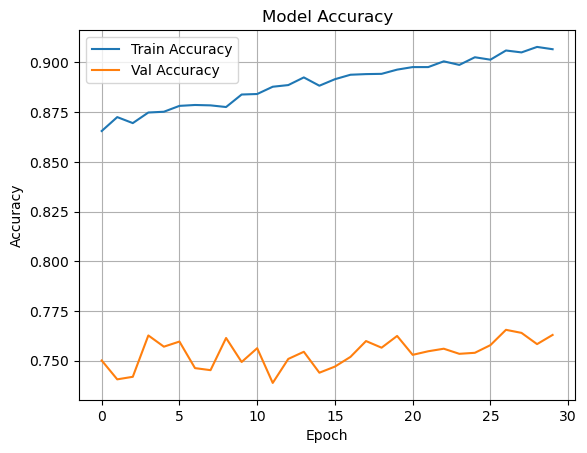

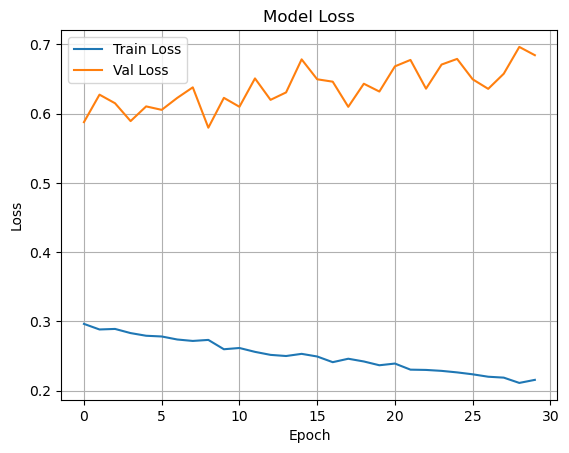

In [22]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [23]:
model.save("my_deepfake_detector.h5")

In [14]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model

model = load_model("my_deepfake_detector.h5")
img_dir = r"C:\Users\akanksha meshram\Downloads\archive (6)\1000_videos\test" # Folder with mixed test images
IMG_SIZE = 128

correct = 0
total = 0

for filename in os.listdir(img_dir):
    if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
        label = 0 if "real" in filename.lower() else 1  # adjust logic if needed
        img_path = os.path.join(img_dir, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img / 255.0
        img = np.expand_dims(img, axis=0)

        pred = model.predict(img)[0][0]
        predicted_label = 1 if pred > 0.5 else 0

        if predicted_label == label:
            correct += 1
        total += 1

print(total, "images processed.")
print(f"Predicted {correct} out of {total} images correctly.")
print(f"✅ Accuracy on test set: {(correct / total) * 100:.2f}%")


0 images processed.
Predicted 0 out of 0 images correctly.


ZeroDivisionError: division by zero

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_true, y_pred, labels=[0, 1]))
print(classification_report(y_true, y_pred, labels=[0, 1], target_names=['Real', 'Fake']))


[[0 0]
 [0 1]]
              precision    recall  f1-score   support

        Real       0.00      0.00      0.00         0
        Fake       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       0.50      0.50      0.50         1
weighted avg       1.00      1.00      1.00         1



c:\Users\akanksha meshram\anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\akanksha meshram\anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\akanksha meshram\anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capi